In [533]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import DataFrame

TOPICS = {
    "topics.topic_0": "Command Line",
    "topics.topic_1": "Client-Server",
    "topics.topic_2": "Cloud",
    "topics.topic_3": "Resource Management",
    "topics.topic_4": "Error Handling & Logging"
}



In [534]:
df = pd.read_csv('full.csv')

In [535]:
df.drop(columns=['Unnamed: 0'], inplace=True)
for col in df.columns:
	if 'language' in col:
		df.drop(columns=[col], inplace=True)
df.describe()

,analyzed_paths,pairs,similarities,issues,commits,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
count,13703.000000,1.370300e+04,10467.000000,13703.000000,13703.000000,13703.000000,13703.000000,11468.000000,9266.000000,9049.000000,13703.000000,1.370300e+04,1.370300e+04,13703.000000,8324.000000,6996.000000
mean,76.884259,5.942503e+04,154.098596,174.068379,784.590309,26.883456,1160.930453,0.360950,0.279739,0.260759,10936.597023,8.822849e+04,1.700028e+04,350.551850,0.279741,0.319453
std,336.190415,1.930047e+06,1014.191085,1096.738333,3401.684323,96.088596,3632.434057,0.256544,0.213156,0.210155,42794.313040,3.295197e+05,9.286598e+04,1258.837789,0.237410,0.271506
min,2.000000,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,101.000000,0.010099,0.010063,0.010016,10.000000,7.200000e+01,0.000000e+00,2.000000,0.010025,0.010026
25%,6.000000,1.500000e+01,7.000000,7.000000,65.000000,3.000000,159.000000,0.143918,0.108315,0.090124,255.000000,1.498000e+03,1.170000e+02,15.000000,0.084595,0.076527
50%,17.000000,1.360000e+02,30.000000,25.000000,173.000000,7.000000,286.000000,0.309139,0.228687,0.206502,755.000000,4.567000e+03,4.380000e+02,40.000000,0.209104,0.244908
75%,51.000000,1.275000e+03,117.000000,88.000000,513.000000,21.000000,731.000000,0.537906,0.408324,0.386560,3188.000000,2.098000e+04,2.306000e+03,145.000000,0.422939,0.519784
max,18370.000000,1.687193e+08,80513.000000,60246.000000,164293.000000,3927.000000,117805.000000,0.999101,0.999764,0.997521,827986.000000,6.593969e+06,2.693242e+06,33349.000000,0.996716,0.999707


In [536]:
epsilon = 1e-6
df['contributors'] = df['contributors'].apply(lambda x: x if x > 0 else epsilon)
df['commits'] = df['commits'].apply(lambda x: x if x > 0 else epsilon)
df['issues'] = df['issues'].apply(lambda x: x if x > 0 else epsilon)
df['stars'] = df['stars'].apply(lambda x: x if x > 0 else epsilon)
df['analyzed_paths'] = df['analyzed_paths'].apply(lambda x: x if x > 0 else epsilon)
df['pairs'] = df['pairs'].apply(lambda x: x if x > 0 else epsilon)
df['similarities'] = df['similarities'].apply(lambda x: x if x > 0 else epsilon)

# df2 = df.loc[:, ["similarities", "issues"]]
# 
# epsilon = 1e-9
# df2['issues'] = df2['issues'].apply(lambda x: x if x > 0 else epsilon)
# df2.corr()


In [537]:
df_nona = df.dropna()

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
df.head()

Mean Squared Error: 96836.40828933466
Coefficients: [ 1.12912796e-04  1.97676821e-01 -8.05711146e-04  4.06896989e-06
 -4.39483167e-02 -4.01863091e-02]
Intercept: 117.08980766371077


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
0,mislav/hub,46,1035,150.0,2018.000000,MIT,3337,2009-12-05,244.0,22649,0.692835,0.247408,0.058288,2539,12621,110,97,NaN,NaN
1,getlantern/lantern,893,398278,138.0,0.000001,NaN,6252,2011-02-17,59.0,13937,0.888254,NaN,0.106459,45439,425248,43672,1701,NaN,NaN
2,direnv/direnv,37,666,171.0,664.000000,MIT,1132,2011-01-04,213.0,11397,0.333218,0.591452,NaN,760,3971,327,64,0.074183,NaN
3,patrickmn/go-cache,2,1,248.0,92.000000,MIT,163,2012-01-02,7.0,7693,NaN,0.232586,0.029679,237,2759,213,4,NaN,0.734904
4,miekg/dns,39,741,1746.0,605.000000,BSD-3-Clause,4173,2010-08-03,227.0,7661,0.118695,0.071108,0.575756,3529,27510,2559,89,0.025523,0.208917


In [538]:
def filter_outliers(series, lower_percentile=0.1, upper_percentile=0.99):
	lower_bound = series.quantile(lower_percentile)
	upper_bound = series.quantile(upper_percentile)
	return series[(series > lower_bound) & (series < upper_bound)]


df['log_stars'] = np.log1p(df['stars'])
df['log_contributors'] = np.log1p(df['contributors'])
df['log_commits'] = np.log1p(df['commits'])
df['log_pairs'] = np.log1p(df['pairs'])
df['log_analyzed_paths'] = np.log1p(df['analyzed_paths'])
df['log_issues'] = np.log1p(df['issues'])
df['log_similarities'] = np.log1p(df['similarities'])
df['log_nfiles'] = np.log1p(df['loc.nFiles'])

df['log_stars'] = filter_outliers(df['log_stars'])
df['log_contributors'] = filter_outliers(df['log_contributors'])
df['log_commits'] = filter_outliers(df['log_commits'])
df['log_pairs'] = filter_outliers(df['log_pairs'])
df['log_analyzed_paths'] = filter_outliers(df['log_analyzed_paths'])
df['log_issues'] = filter_outliers(df['log_issues'])
df['log_similarities'] = filter_outliers(df['log_similarities'])
df['log_nfiles'] = filter_outliers(df['log_nfiles'])

# remove nan values
df.dropna(inplace=True)

In [539]:
sample = df.sample(100)
sample.head()

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,topics.topic_2,topics.topic_4,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,log_similarities,log_nfiles
12432,sigstore/gitsign,28,378,60.0,63.0,NOASSERTION,425,2022-05-12,23.0,879,...,0.012799,0.052637,6.779922,3.178054,6.054439,5.937536,3.367296,4.158883,4.110874,4.189655
1469,ovn-org/libovsdb,43,903,312.0,100.0,Apache-2.0,735,2014-10-09,30.0,173,...,0.019673,0.648908,5.159055,3.433987,6.601230,6.806829,3.784190,4.615121,5.746203,4.624973
1885,rsc/c2go,26,325,209.0,6.0,BSD-3-Clause,49,2015-01-20,2.0,499,...,0.013976,0.013698,6.214608,1.098612,3.912023,5.786897,3.295837,1.945910,5.347108,3.583519
8443,biter777/countries,8,28,127.0,30.0,BSD-2-Clause,365,2019-04-22,20.0,337,...,0.032231,0.439197,5.823046,3.044522,5.902633,3.367296,2.197225,3.433987,4.852030,3.091042
3772,sachaos/todoist,23,253,51.0,144.0,MIT,385,2016-10-18,32.0,1393,...,0.018796,0.057312,7.239933,3.496508,5.955837,5.537334,3.178054,4.976734,3.951244,3.526361


In [540]:
sample['log_similarities']

12432    4.110874
1469     5.746203
1885     5.347108
8443     4.852030
3772     3.951244
           ...   
351      3.044522
1468     4.653960
10125    5.733341
6820     4.248495
269      3.663562
Name: log_similarities, Length: 100, dtype: float64

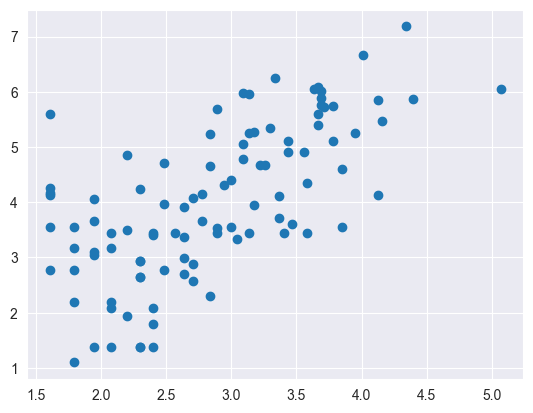

In [541]:
plt.scatter(sample['log_analyzed_paths'], sample['log_similarities'])

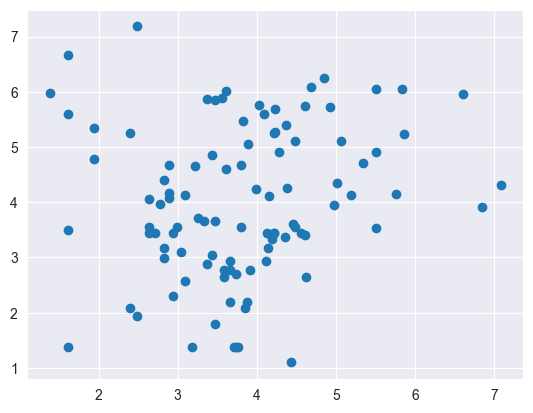

In [542]:
plt.scatter(sample['log_issues'], sample['log_similarities'])

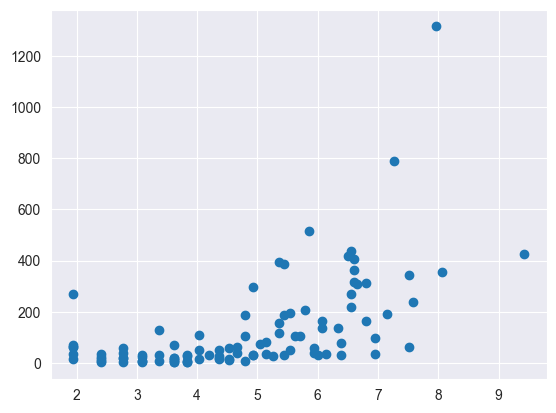

In [543]:
plt.scatter(sample['log_pairs'], sample['similarities'])

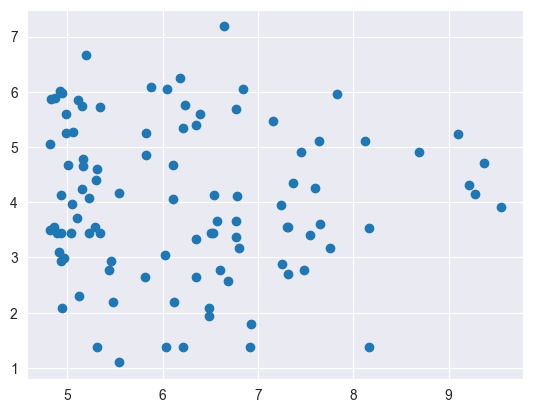

In [544]:
plt.scatter(sample['log_stars'], sample['log_similarities'])

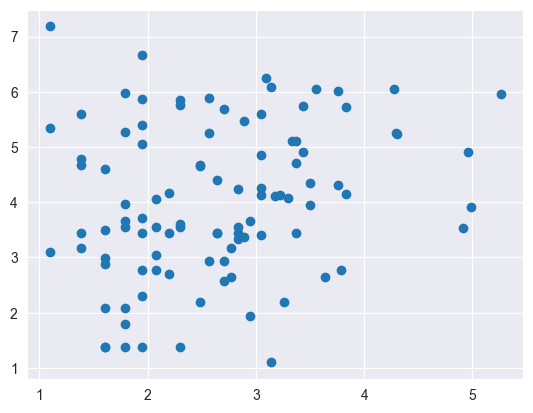

In [545]:
plt.scatter(sample['log_contributors'], sample['log_similarities'])

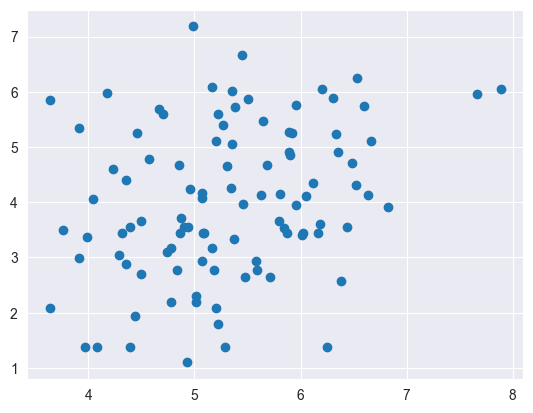

In [546]:
plt.scatter(sample['log_commits'], sample['log_similarities'])

In [547]:
reg_stars = np.polyfit(sample['log_stars'], sample['log_similarities'], deg = 1)
reg_stars

array([-0.0441735 ,  4.28889991])

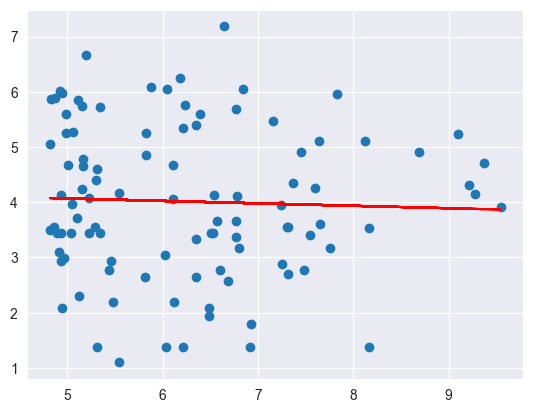

In [548]:
trend_stars = np.polyval(reg_stars, sample['log_stars'])
plt.scatter(sample['log_stars'], sample['log_similarities'])
plt.plot(sample['log_stars'], trend_stars, color='red')

In [549]:
reg_contributors = np.polyfit(sample['log_contributors'], sample['log_similarities'], deg = 1)
reg_contributors

array([0.33691903, 3.12508616])

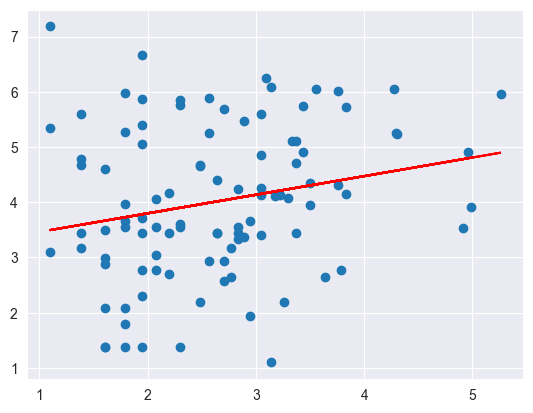

In [550]:
trend_contributors = np.polyval(reg_contributors, sample['log_contributors'])
plt.scatter(sample['log_contributors'], sample['log_similarities'])
plt.plot(sample['log_contributors'], trend_contributors, color='red')

In [551]:
reg_commits = np.polyfit(sample['log_commits'], sample['log_similarities'], deg = 1)
reg_commits

array([0.48200403, 1.45164323])

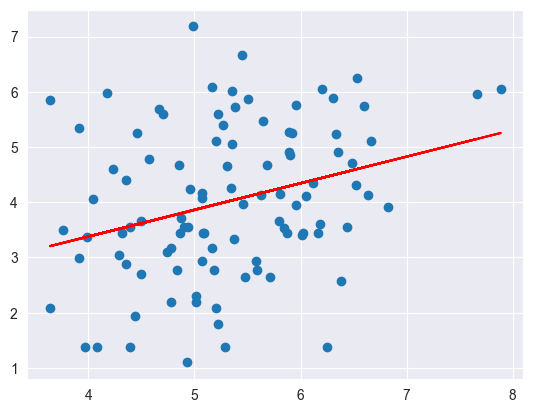

In [552]:
trend_commits = np.polyval(reg_commits, sample['log_commits'])
plt.scatter(sample['log_commits'], sample['log_similarities'])
plt.plot(sample['log_commits'], trend_commits, color='red')

In [553]:
reg_pairs = np.polyfit(sample['log_pairs'], sample['log_similarities'], deg = 1)
reg_pairs

array([0.54264119, 1.41758651])

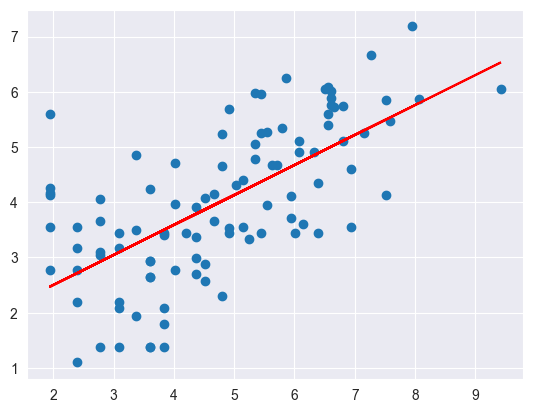

In [554]:
trend_pairs = np.polyval(reg_pairs, sample['log_pairs'])
plt.scatter(sample['log_pairs'], sample['log_similarities'])
plt.plot(sample['log_pairs'], trend_pairs, color='red')

In [555]:
reg_analyzed_paths = np.polyfit(sample['log_analyzed_paths'], sample['log_similarities'], deg = 1)
reg_analyzed_paths

array([1.19994582, 0.59264275])

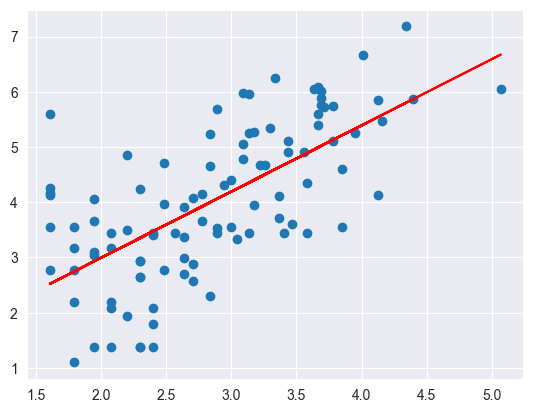

In [556]:
trend_analyzed_paths = np.polyval(reg_analyzed_paths, sample['log_analyzed_paths'])
plt.scatter(sample['log_analyzed_paths'], sample['log_similarities'])
plt.plot(sample['log_analyzed_paths'], trend_analyzed_paths, color='red')

In [557]:
reg_issues = np.polyfit(sample['log_issues'], sample['log_similarities'], deg = 1)
reg_issues

array([0.18470566, 3.31057584])

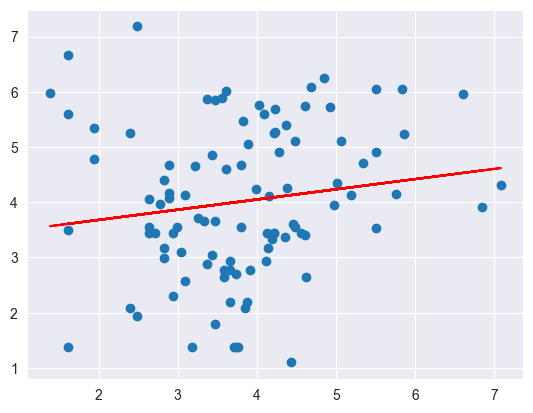

In [558]:
trend_issues = np.polyval(reg_issues, sample['log_issues'])
plt.scatter(sample['log_issues'], sample['log_similarities'])
plt.plot(sample['log_issues'], trend_issues, color='red')

<Axes: xlabel='log_stars', ylabel='log_similarities'>

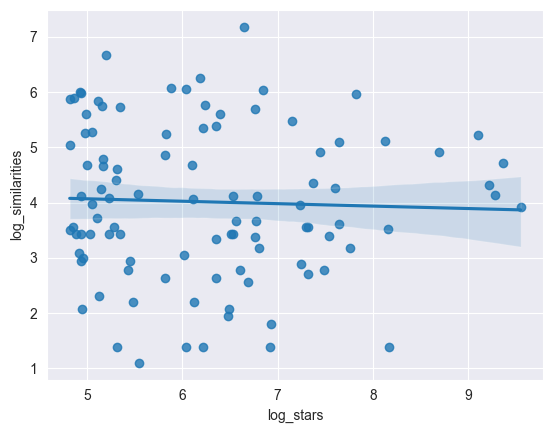

In [559]:
sb.regplot(x='log_stars', y='log_similarities', data=sample)

# Linear Regression

In [560]:
df_small = DataFrame(df, columns=['log_contributors', 'log_commits', 'log_issues', 'log_similarities', 'log_stars', 'log_pairs', 'log_analyzed_paths', 'log_nfiles'])
sample = df_small.sample(100)

R^2 Score: -0.0019269739322169688


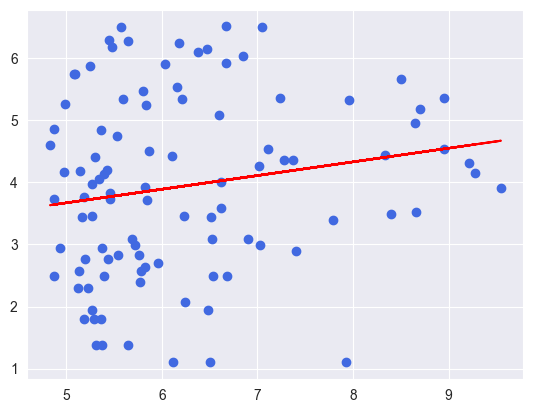

In [561]:
from pandas import DataFrame
from sklearn.linear_model import HuberRegressor

X = DataFrame(sample, columns=['log_stars'])
y = DataFrame(sample, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()


R^2 Score: -0.14013411527445419


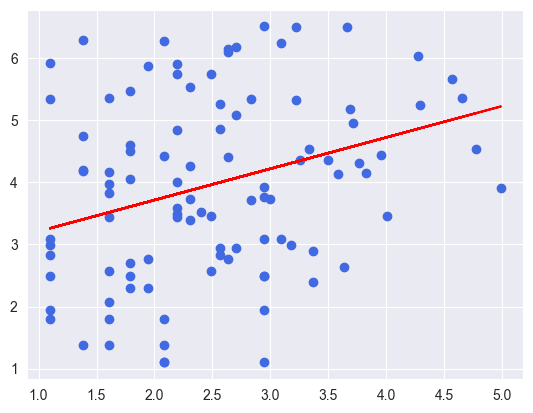

In [579]:
X = DataFrame(sample, columns=['log_contributors'])
y = DataFrame(sample, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()


R^2 Score: -0.03216654771845984


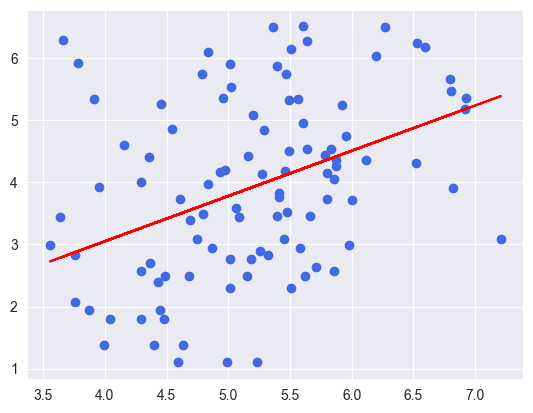

In [580]:

X = DataFrame(sample, columns=['log_commits'])
y = DataFrame(sample, columns=['log_similarities'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()


R^2 Score: 0.1643024666638786


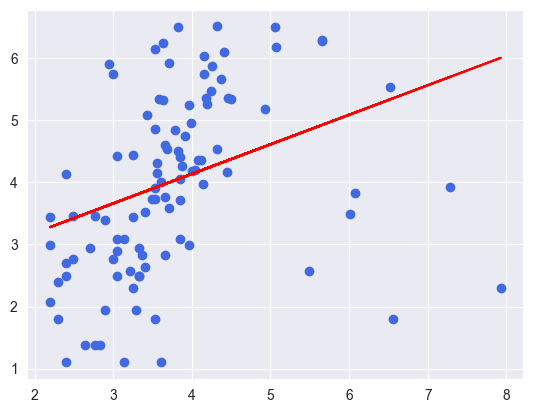

In [581]:
X = DataFrame(sample, columns=['log_nfiles'])
y = DataFrame(sample, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()



## Correlation Analysis

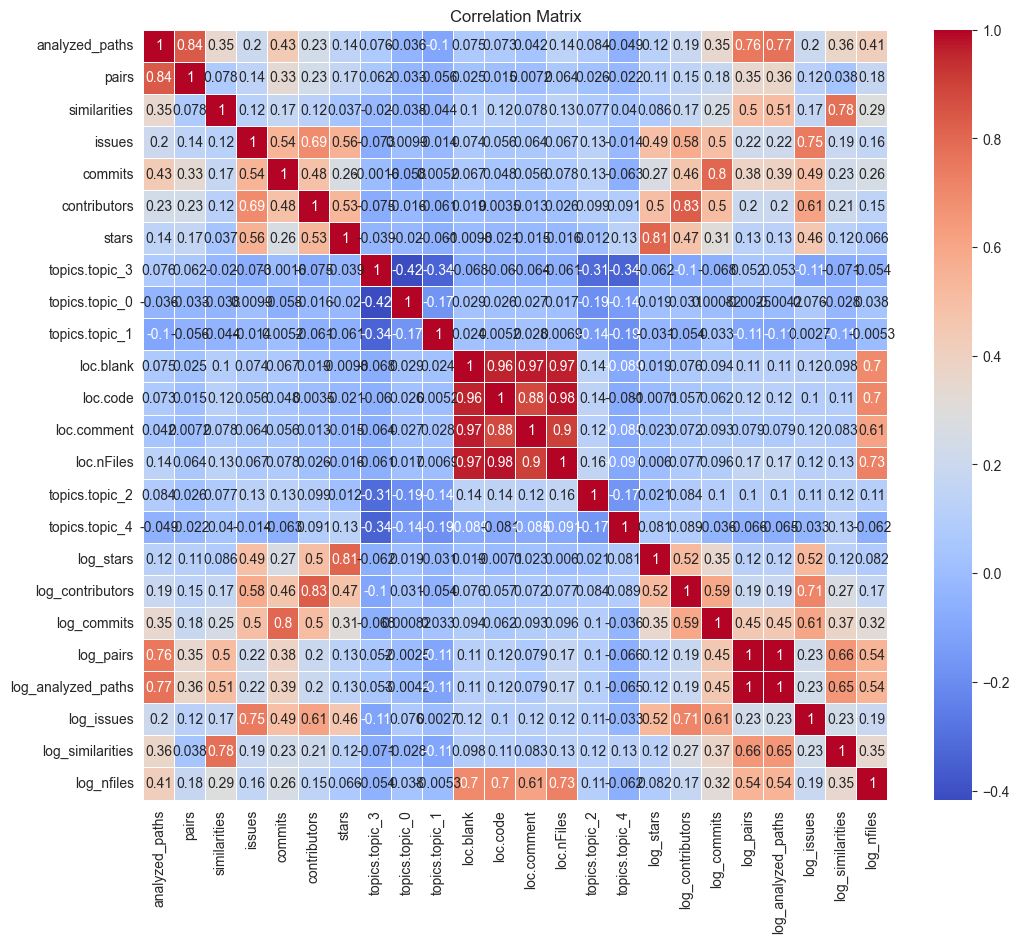

In [565]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Random Forest

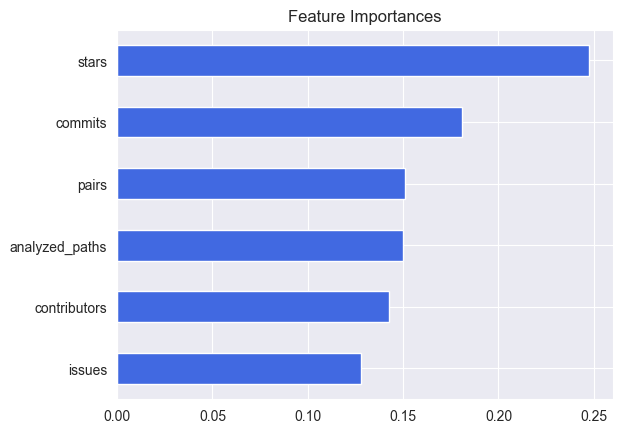

In [566]:
from sklearn.ensemble import RandomForestRegressor

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.sort_values().plot(kind='barh', color='royalblue')
plt.title('Feature Importances')
plt.show()

# Topic Distribution

In [567]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df_nona.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
# tdf.head()






In [568]:
tdf_resources = tdf[tdf['max_value_topic'] == 'topics.topic_3']
tdf_resources

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4,max_value_topic,max_value_topic_amount
54,xmppo/go-xmpp,9,36,31.000000,56.0,BSD-3-Clause,287,2011-02-28,54.0,509,...,0.020411,0.020165,284,2441,218,11,0.020261,0.020723,topics.topic_3,0.918440
104,fhs/gompd,4,6,61.000000,21.0,MIT,277,2011-08-31,24.0,138,...,0.010116,0.158131,352,2873,366,9,0.010204,0.010141,topics.topic_3,0.811409
115,vksnk/go-fann,8,28,220.000000,6.0,MIT,45,2011-03-10,3.0,115,...,0.022423,0.022653,233,635,88,11,0.150439,0.022875,topics.topic_3,0.781610
202,mikespook/Learning-Go-zh-cn,5,10,9.000000,25.0,NOASSERTION,1449,2013-02-22,29.0,2640,...,0.068573,0.068170,64,275,9,19,0.068619,0.069273,topics.topic_3,0.725366
204,studygolang/studygolang,143,10153,767.000000,124.0,BSD-3-Clause,927,2013-03-05,20.0,2605,...,0.010874,0.010986,5068,21141,2275,204,0.010585,0.010625,topics.topic_3,0.956931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,MrIceman/go-uml,3,3,2.000000,1.0,MIT,38,2023-04-26,2.0,136,...,0.141743,0.303058,89,381,11,5,0.024765,0.104336,topics.topic_3,0.426097
13559,reproducible-containers/diffoci,14,91,10.000000,6.0,Apache-2.0,115,2023-08-22,3.0,129,...,0.346262,0.112268,245,2431,98,20,0.118094,0.028829,topics.topic_3,0.394547
13604,speakeasy-api/speakeasy,68,2278,184.000000,156.0,NOASSERTION,845,2022-09-29,20.0,120,...,0.217455,0.154457,2743,14654,279,102,0.132962,0.082214,topics.topic_3,0.412912
13686,stealthrocket/wasi-go,37,666,0.000001,11.0,Apache-2.0,220,2023-04-17,10.0,103,...,0.115181,0.071557,2068,11998,1289,63,0.281485,0.244723,topics.topic_3,0.287055


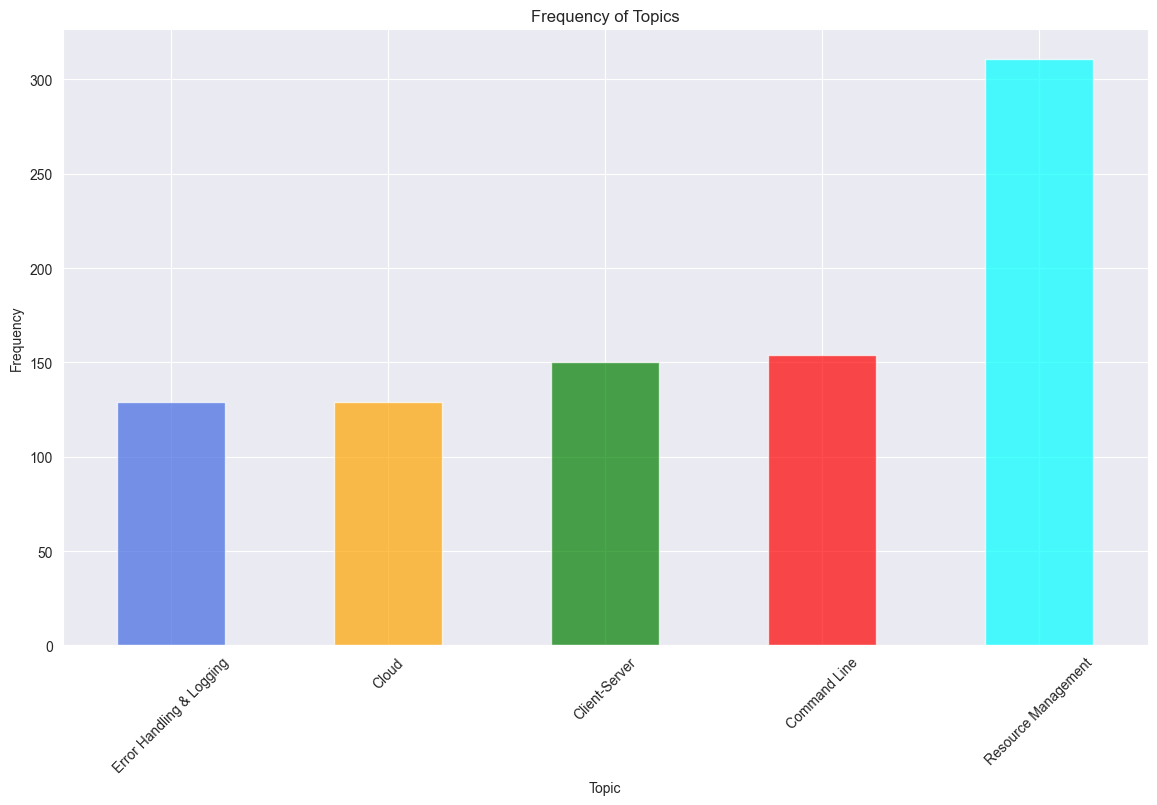

In [569]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()


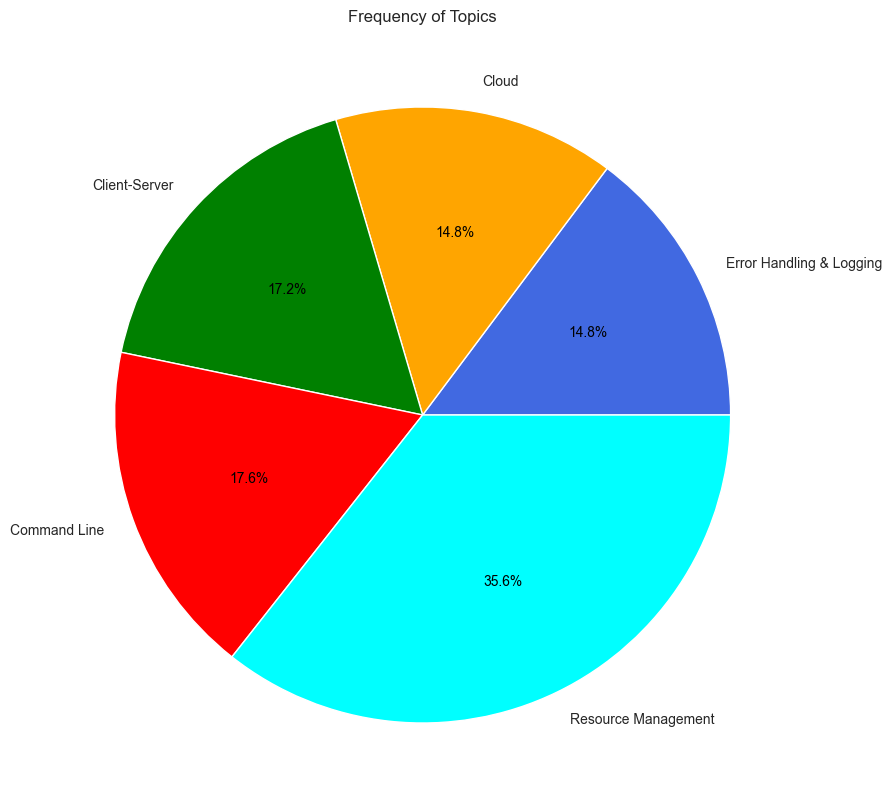

In [570]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
	autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [571]:
# verify nones
# count topics 
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series

max_value_topic
Resource Management         471
Client-Server               221
Cloud                       221
Command Line                220
Error Handling & Logging    172
Name: count, dtype: int64

# Topic Distribution With Nones


In [572]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
tdf.head()


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,log_similarities,log_nfiles,max_value_topic,max_value_topic_amount
12,go-gorp/gorp,17,136,415.0,236.0,MIT,554,2012-01-04,71.0,3706,...,8.217978,4.276666,6.318968,4.919981,2.890372,5.468060,6.030685,3.367296,topics.topic_4,0.768748
46,jackc/tern,4,6,14.0,58.0,MIT,442,2011-02-08,18.0,747,...,6.617403,2.944439,6.093570,1.945910,1.609438,4.077537,2.708050,2.564949,topics.topic_0,0.513169
54,xmppo/go-xmpp,9,36,31.0,56.0,BSD-3-Clause,287,2011-02-28,54.0,509,...,6.234411,4.007333,5.662960,3.610918,2.302585,4.043051,3.465736,2.484907,topics.topic_3,0.918440
72,wernerd/GoRTP,6,15,138.0,5.0,GPL-3.0,36,2011-12-20,4.0,303,...,5.717028,1.609438,3.610918,2.772589,1.945910,1.791759,4.934474,2.639057,topics.topic_4,0.346954
104,fhs/gompd,4,6,61.0,21.0,MIT,277,2011-08-31,24.0,138,...,4.934474,3.218876,5.627621,1.945910,1.609438,3.091042,4.127134,2.302585,topics.topic_3,0.811409


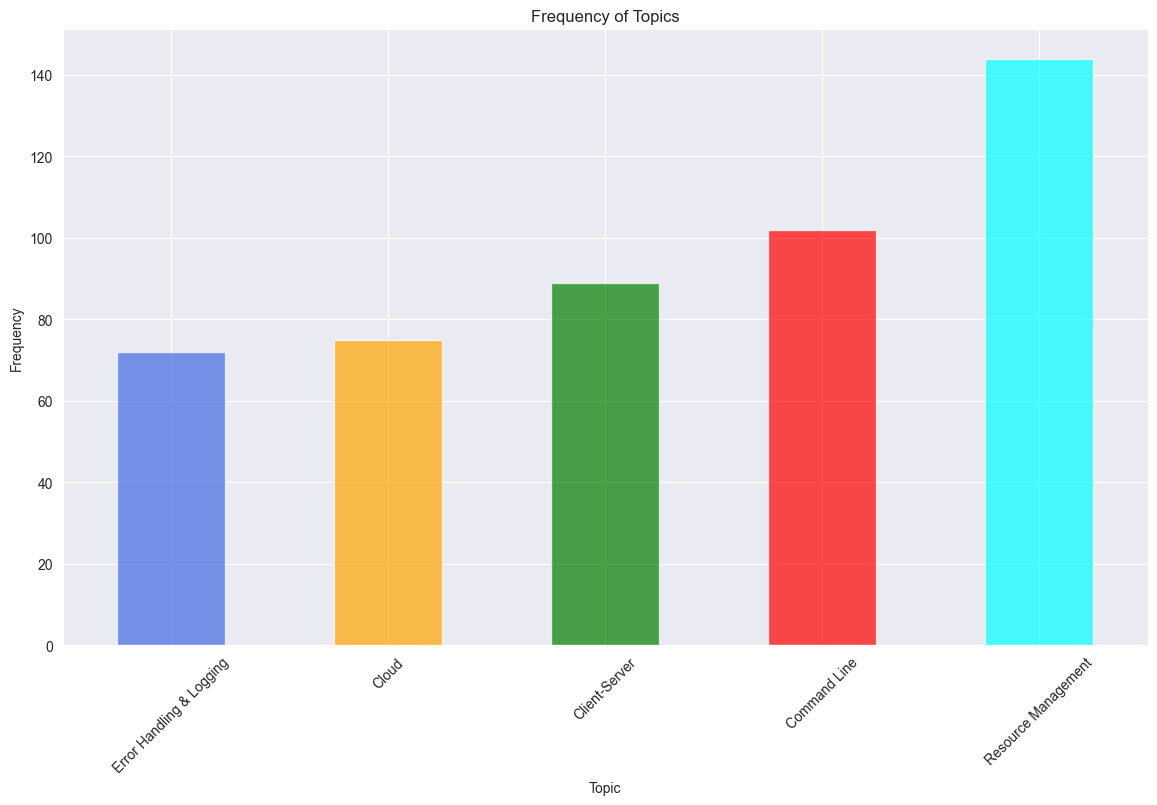

In [573]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()

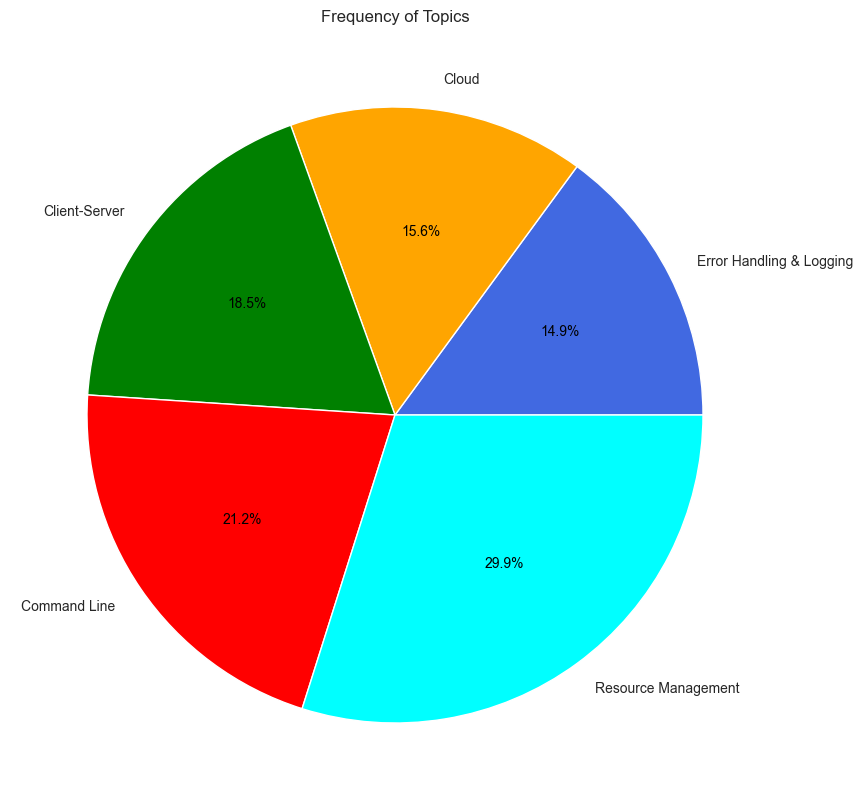

In [574]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
    autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [575]:
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series


max_value_topic
Resource Management         146
Command Line                103
Client-Server                91
Cloud                        75
Error Handling & Logging     72
Name: count, dtype: int64

# Clone Density


In [576]:
tdf['clone_density'] = (tdf['loc.nFiles'] / tdf['similarities']) * 1000
tdf.head()

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,log_similarities,log_nfiles,max_value_topic,max_value_topic_amount,clone_density
12,go-gorp/gorp,17,136,415.0,236.0,MIT,554,2012-01-04,71.0,3706,...,4.276666,6.318968,4.919981,2.890372,5.468060,6.030685,3.367296,topics.topic_4,0.768748,67.469880
46,jackc/tern,4,6,14.0,58.0,MIT,442,2011-02-08,18.0,747,...,2.944439,6.093570,1.945910,1.609438,4.077537,2.708050,2.564949,topics.topic_0,0.513169,857.142857
54,xmppo/go-xmpp,9,36,31.0,56.0,BSD-3-Clause,287,2011-02-28,54.0,509,...,4.007333,5.662960,3.610918,2.302585,4.043051,3.465736,2.484907,topics.topic_3,0.918440,354.838710
72,wernerd/GoRTP,6,15,138.0,5.0,GPL-3.0,36,2011-12-20,4.0,303,...,1.609438,3.610918,2.772589,1.945910,1.791759,4.934474,2.639057,topics.topic_4,0.346954,94.202899
104,fhs/gompd,4,6,61.0,21.0,MIT,277,2011-08-31,24.0,138,...,3.218876,5.627621,1.945910,1.609438,3.091042,4.127134,2.302585,topics.topic_3,0.811409,147.540984


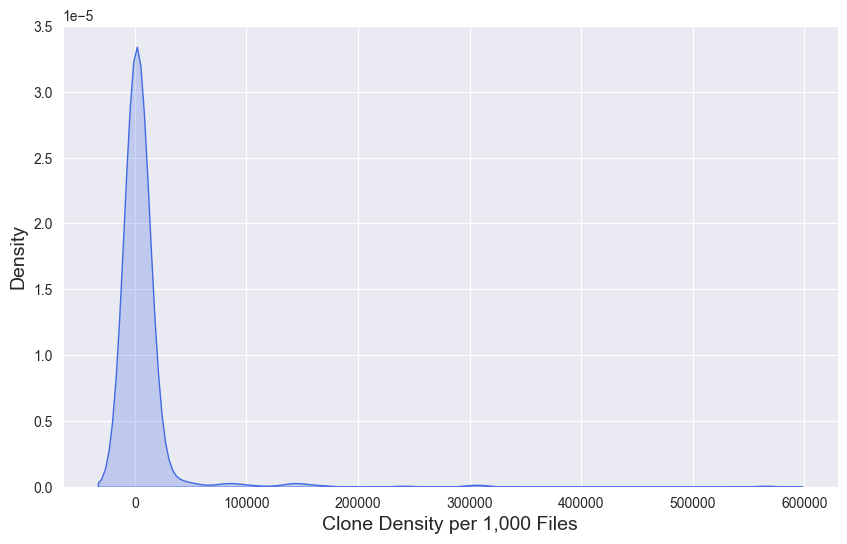

In [577]:
# Assuming df is your DataFrame with the clone density already calculated
plt.figure(figsize=(10, 6))

# Density Plot
sb.kdeplot(tdf['clone_density'], fill=True, color='royalblue')

# Adding titles and labels
# plt.title('Density Plot of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Display the plot
plt.show()

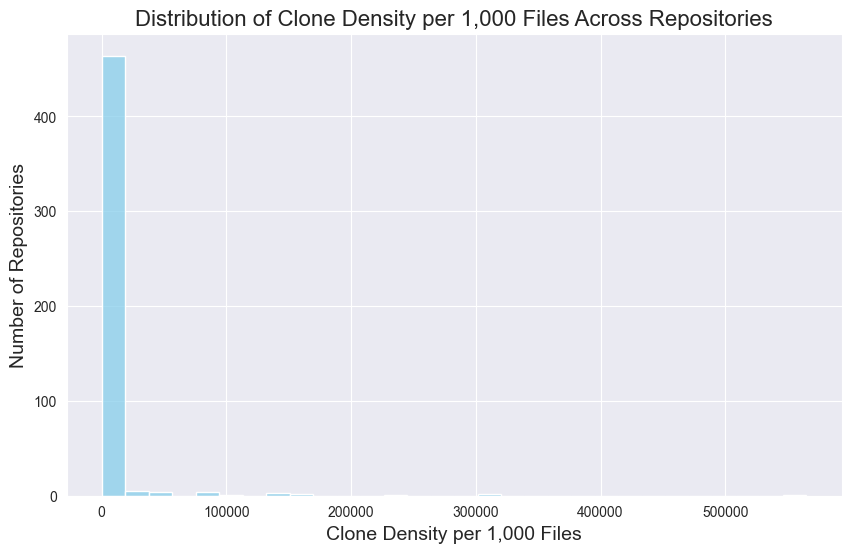

In [578]:
plt.figure(figsize=(10, 6))

# Histogram
sb.histplot(tdf['clone_density'], kde=False, bins=30, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Number of Repositories', fontsize=14)

# Display the plot
plt.show()